**Importing the required libraries**

**This involves importing all those libraries which are required for Exploratory data analysis and model development**




In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

**Reading the csv file and converting the dataset to dataframe**

In [518]:
# Open the CSV file in a text editor and add quotes around fields with commas
c = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv", encoding="ISO-8859-1")

**Displaying the first five rows using the head() function**

In [519]:
c.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


**Info of the data**

In [520]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Filling all the null values using the fillna() function and forward fill method**

In [521]:
c['UnitPrice'] = c['UnitPrice'].fillna(method = 'ffill')

In [522]:
c['CustomerID'] = c['CustomerID'].fillna(method = 'ffill')

In [523]:
c['Description'] = c['Description'].fillna(method = 'ffill')

In [524]:
c['Country'] = c['Country'].fillna(method = 'ffill')

In [525]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [526]:
c.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Description of the data**

In [527]:
c.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15272.795237
std,218.081158,96.759853,1737.934523
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13798.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16803.000000
max,80995.000000,38970.000000,18287.000000


**Scatterplot between Unit Price and the Quantity**

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

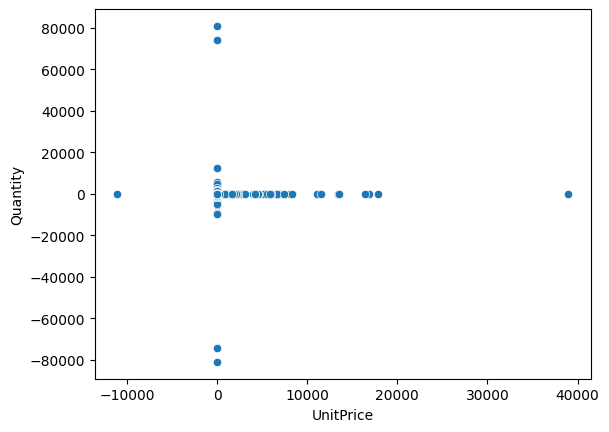

In [528]:
sns.scatterplot(x = 'UnitPrice',y = 'Quantity',data = c)

**Quantity plot**

Text(0.5, 0, 'Quantity')

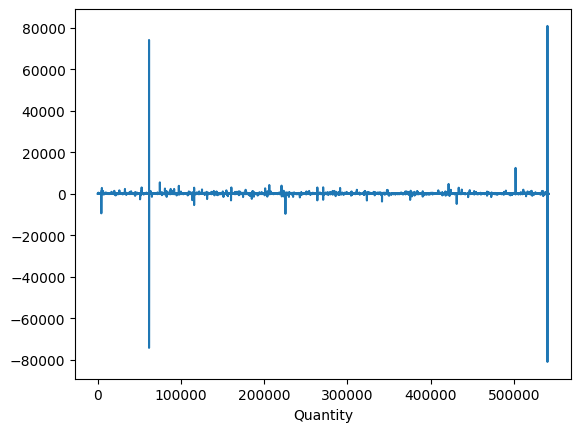

In [529]:
c['Quantity'].plot()
plt.xlabel('Quantity')

**Violin plot of Quantity**

<Axes: ylabel='Quantity'>

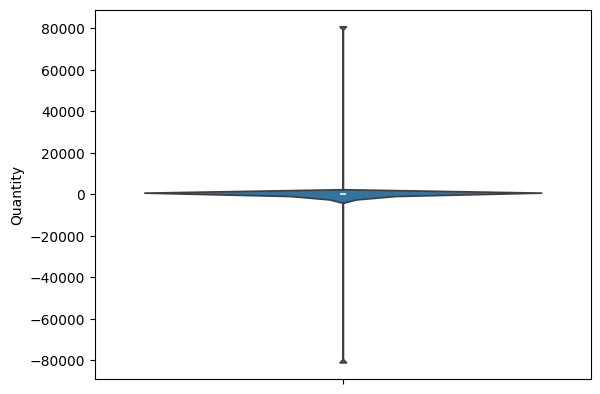

In [530]:
sns.violinplot(c['Quantity'])

**Violin Plot of Unit Price**

<Axes: ylabel='UnitPrice'>

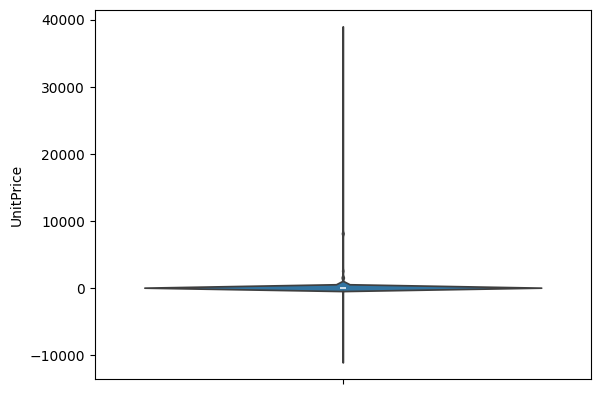

In [531]:
sns.violinplot(c['UnitPrice'])

In [532]:
c['UnitPrice'] > 0

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: UnitPrice, Length: 541909, dtype: bool

In [533]:
c['Quantity'] > 0

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: Quantity, Length: 541909, dtype: bool

**Changing the Date format**

In [534]:
import datetime as dt
d = dt.date(2011,12,9)

In [535]:
d

datetime.date(2011, 12, 9)

**Adding the new column date to the dataframe**

In [536]:
c['date'] = pd.DatetimeIndex(c.InvoiceDate).date

In [537]:
c.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


**Boxplot of the CustomerID which gives the 5 member summary of the data**

**1. Minimum = 12000**

**2. First Quartile = 13850**

**3. Median = 15100**

**4. Third Quartile = 17850**

**5. Maximum = 18500**

<Axes: xlabel='CustomerID'>

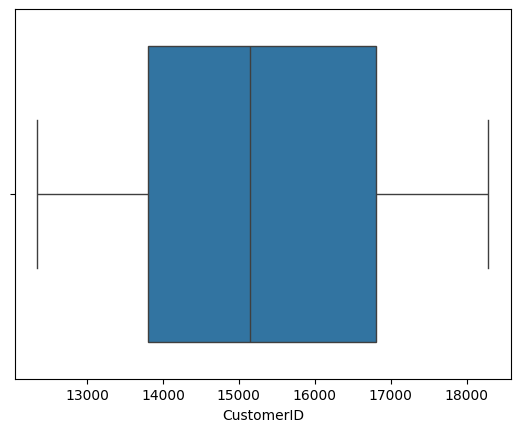

In [538]:
sns.boxplot(x = 'CustomerID', data = c)

**Calculation of Recency**

In [539]:
recency = c.groupby(['CustomerID'], as_index = False)['date'].max()
recency.columns = ['CustomerID', 'LastPurchaseDate']
recency.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


**Graph of Recency as a time series**

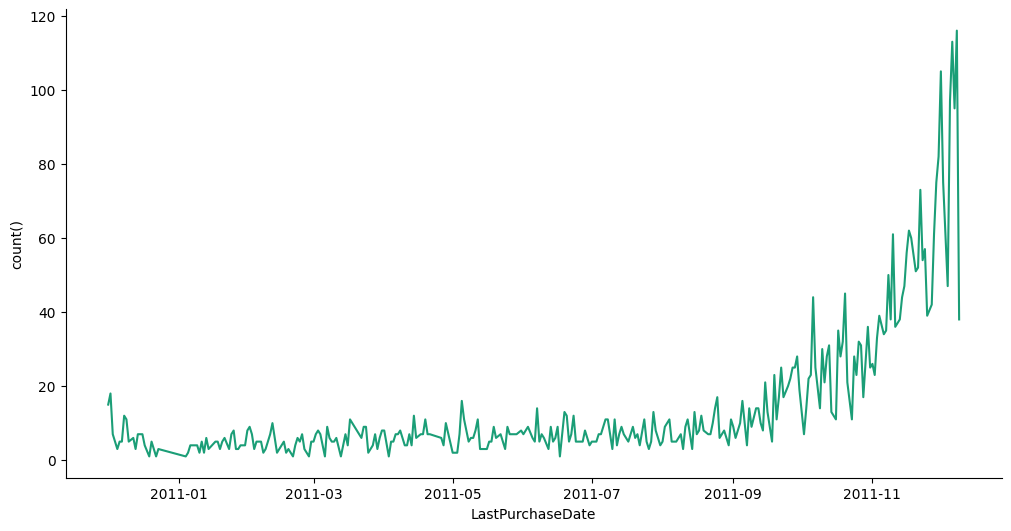

In [540]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['LastPurchaseDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'LastPurchaseDate'}, axis=1)
              .sort_values('LastPurchaseDate', ascending=True))
  xs = counted['LastPurchaseDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = recency.sort_values('LastPurchaseDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('LastPurchaseDate')
_ = plt.ylabel('count()')

In [541]:
recency['Recency'] = recency.LastPurchaseDate.apply(lambda x:(d - x).days)

In [542]:
recency.head(5)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


**Recency Graph**

<Axes: xlabel='Recency', ylabel='Density'>

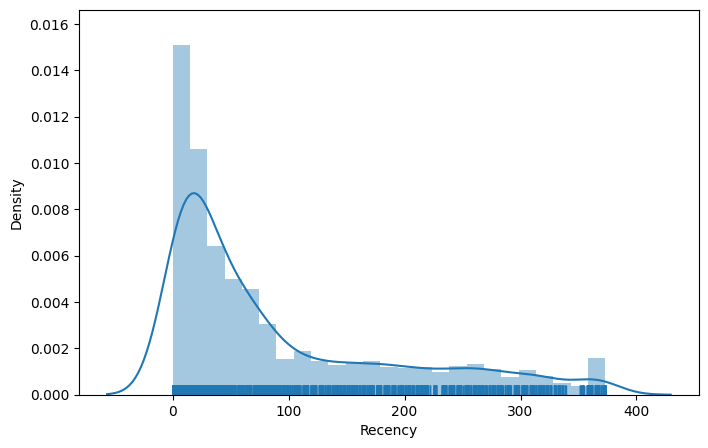

In [543]:
plt.figure(figsize=(8,5))
sns.distplot(recency.Recency, kde = True, rug = True)

In [544]:
recency.drop(columns=['LastPurchaseDate'],inplace=True)

In [545]:
recency

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


**Calculation of Frequency**

In [546]:
freq = c
freq = freq.groupby('CustomerID', as_index = False)['InvoiceNo'].count()
freq_dataframe = pd.DataFrame(freq)
freq_dataframe.columns = ['CustomerID','Frequency']
freq_dataframe.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,206
3,12349.0,73
4,12350.0,17


**Frequency Graph**

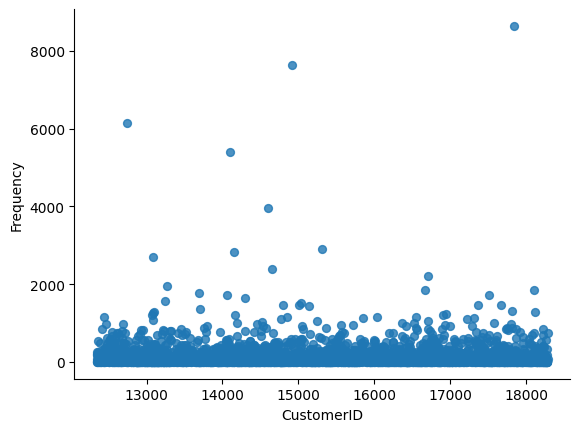

In [547]:
from matplotlib import pyplot as plt
freq_dataframe.plot(kind='scatter', x='CustomerID', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Calculation of Monetary**

In [548]:
c['Price'] = c['UnitPrice'] * c['Quantity']

In [549]:
monetary = c.groupby(['CustomerID'], as_index = False)['Price'].sum()
monetary.columns = ['CustomerID', 'Monetary']

In [550]:
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,3366.27
3,12349.0,1757.55
4,12350.0,334.40


**Scatterplot between monetary and customerID**

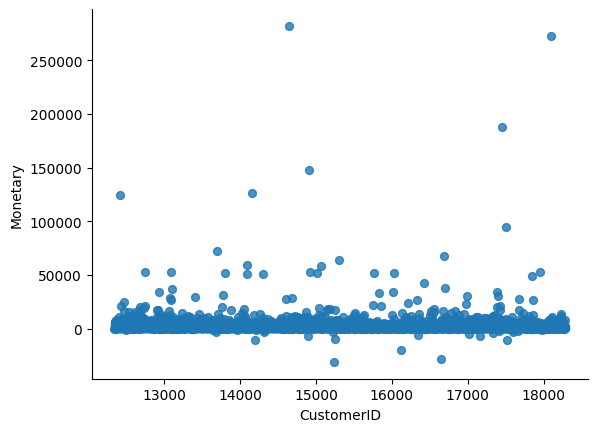

In [551]:
from matplotlib import pyplot as plt
monetary.plot(kind='scatter', x='CustomerID', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Monetary graph**

<Axes: xlabel='Monetary', ylabel='Density'>

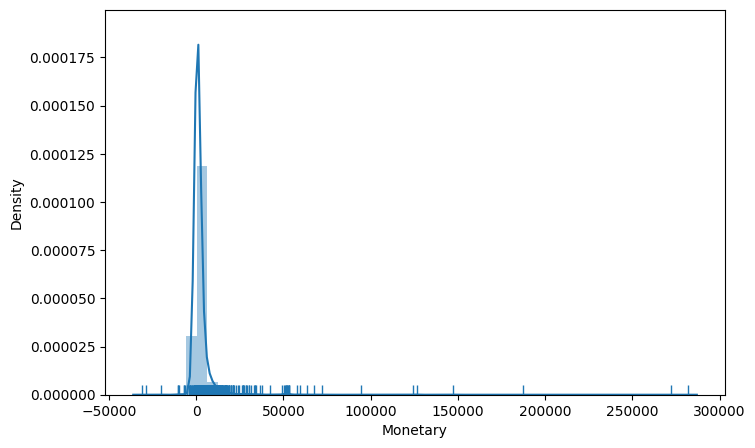

In [552]:
plt.figure(figsize = (8,5))
sns.distplot(monetary.Monetary, kde = True, rug = True)

**Monetary added to the new dataframe**

In [553]:
recency_frequency = recency.merge(freq, on = 'CustomerID')
recency_frequency_monetary = recency_frequency.merge(monetary)
recency_frequency_monetary.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
recency_frequency_monetary.set_index('CustomerID', inplace = True)
recency_frequency_monetary.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,206,3366.27
12349.0,18,73,1757.55
12350.0,310,17,334.40


**Frequency of Recency**

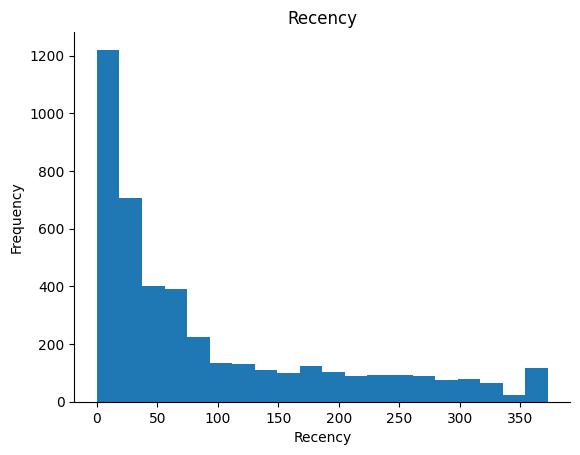

In [554]:
from matplotlib import pyplot as plt
recency_frequency_monetary['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.xlabel("Recency")
plt.gca().spines[['top', 'right',]].set_visible(False)

**Frequency of Frequency**

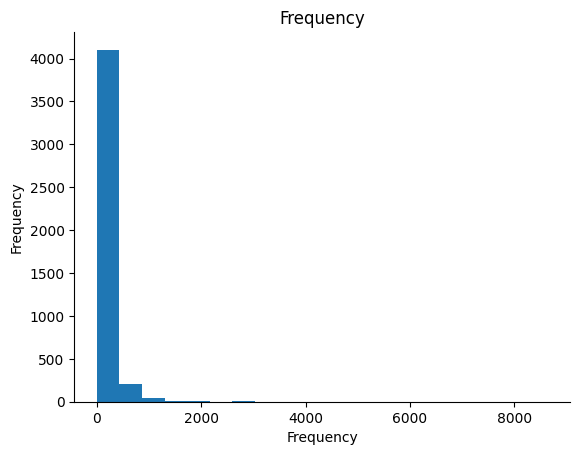

In [555]:
from matplotlib import pyplot as plt
recency_frequency_monetary['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.xlabel('Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Frequency of Monetary**

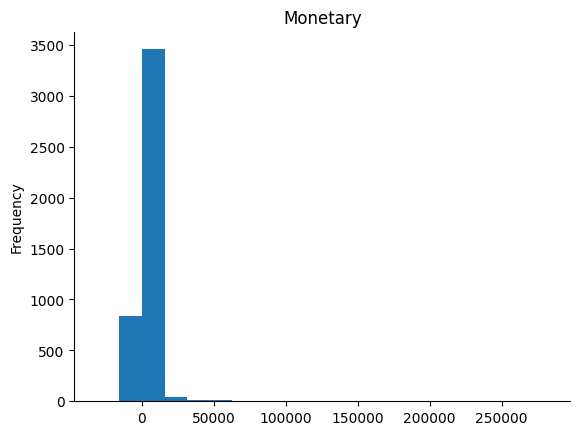

In [556]:
from matplotlib import pyplot as plt
recency_frequency_monetary['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Elbow Graph of the Clustering model**

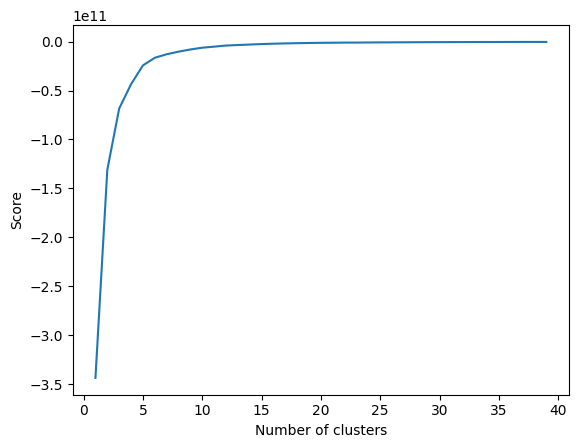

In [557]:
n = range(1,40)
Clustering_model = [KMeans(n_clusters=i) for i in n]
score = [Clustering_model[i].fit(recency_frequency_monetary).score(recency_frequency_monetary) for i in range(len(Clustering_model))]
plt.plot(n, score)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.show()

**Assigning the number of clusters to be made by the model for clustering the objects and fitting the required data in the model for training by taking 3 number of clusters**

In [558]:
Clustering_model = KMeans(n_clusters = 3, random_state = 0).fit(recency_frequency_monetary)

In [559]:
recency_frequency_monetary['cluster'] = Clustering_model.labels_

**First Five 0 Clusters**

In [560]:
recency_frequency_monetary[recency_frequency_monetary.cluster == 0].head(5)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,325,2,0.00,0
12347.0,2,182,4310.00,0
12348.0,75,206,3366.27,0
12349.0,18,73,1757.55,0
12350.0,310,17,334.40,0


**First Five 1 Clusters**

In [561]:
recency_frequency_monetary[recency_frequency_monetary.cluster == 1].head(5)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12415.0,24,851,124594.39,1
14156.0,9,2825,126339.52,1
14646.0,1,2385,282038.74,1
14911.0,1,7648,147375.15,1
17450.0,8,371,187523.77,1


**First Five 2 Clusters**

In [562]:
recency_frequency_monetary[recency_frequency_monetary.cluster == 2].head(5)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12471.0,2,976,24755.97,2
12748.0,0,6134,53005.87,2
12931.0,21,157,33785.29,2
13081.0,1,1086,28396.08,2
13089.0,2,2693,52955.14,2


**Training of the Clustering model by taking 4 number of clusters(not chosen for analysis because the number of objects in the clusters are not equal that is in cluster 1 two objects are missing**

In [563]:
Clustering_model2 = KMeans(n_clusters = 4, random_state = 0).fit(recency_frequency_monetary)

In [564]:
recency_frequency_monetary['cluster2'] = Clustering_model2.labels_

In [565]:
recency_frequency_monetary[recency_frequency_monetary.cluster2 == 0].head(5)

,Recency,Frequency,Monetary,cluster,cluster2
CustomerID,,,,,
12346.0,325,2,0.00,0,0
12347.0,2,182,4310.00,0,0
12348.0,75,206,3366.27,0,0
12349.0,18,73,1757.55,0,0
12350.0,310,17,334.40,0,0


In [566]:
recency_frequency_monetary[recency_frequency_monetary.cluster2 == 1].head(5)

,Recency,Frequency,Monetary,cluster,cluster2
CustomerID,,,,,
14646.0,1,2385,282038.74,1,1
17450.0,8,371,187523.77,1,1
18102.0,0,1860,272390.60,1,1


In [567]:
recency_frequency_monetary[recency_frequency_monetary.cluster2 == 2].head(5)

,Recency,Frequency,Monetary,cluster,cluster2
CustomerID,,,,,
12415.0,24,851,124594.39,1,2
12748.0,0,6134,53005.87,2,2
13089.0,2,2693,52955.14,2,2
13694.0,3,1767,72262.43,2,2
13798.0,1,928,51409.27,2,2


In [568]:
recency_frequency_monetary[recency_frequency_monetary.cluster2 == 3].head(5)

,Recency,Frequency,Monetary,cluster,cluster2
CustomerID,,,,,
12362.0,3,530,8074.35,0,3
12409.0,78,114,11056.93,0,3
12428.0,25,303,7877.20,0,3
12433.0,0,1152,21065.10,0,3
12435.0,79,36,7829.89,0,3


**Barplot of Recency, Frequency and Monetary versus the number of clusters**

<Figure size 10000x1000 with 0 Axes>

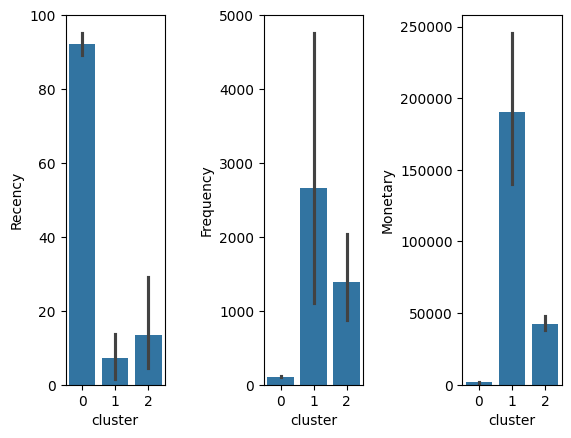

In [569]:
plt.figure(figsize = (100,10))
plt.subplots(1, 3)
sns.barplot(x = recency_frequency_monetary.cluster, y = recency_frequency_monetary.Recency, data = recency_frequency_monetary, ax = plt.subplot(1, 3, 1))
sns.barplot(x = recency_frequency_monetary.cluster, y = recency_frequency_monetary.Frequency, data = recency_frequency_monetary, ax = plt.subplot(1, 3, 2))
sns.barplot(x = recency_frequency_monetary.cluster, y = recency_frequency_monetary.Monetary, data = recency_frequency_monetary, ax = plt.subplot(1, 3, 3))
plt.subplots_adjust(wspace = 1)

**Steps for the development of the churn prediction model**

In [570]:
recency_frequency_monetary['Churn_risk'] =  recency_frequency_monetary['cluster'].apply(lambda x:'High' if x == 1 else 'Low')

In [571]:
recency_frequency_monetary['Churn_risk'] = recency_frequency_monetary['Churn_risk'].replace({'High': 1, 'Low': 0})

In [572]:
recency_frequency_monetary['Churn_risk'] == 'Low'

CustomerID
12346.0    False
12347.0    False
12348.0    False
12349.0    False
12350.0    False
           ...  
18280.0    False
18281.0    False
18282.0    False
18283.0    False
18287.0    False
Name: Churn_risk, Length: 4372, dtype: bool

**Churn risk column added the dataframe**

In [573]:
recency_frequency_monetary

,Recency,Frequency,Monetary,cluster,cluster2,Churn_risk
CustomerID,,,,,,
12346.0,325,2,0.00,0,0,0
12347.0,2,182,4310.00,0,0,0
12348.0,75,206,3366.27,0,0,0
12349.0,18,73,1757.55,0,0,0
12350.0,310,17,334.40,0,0,0
...,...,...,...,...,...,...
18280.0,277,325,8330.57,0,3,0
18281.0,180,7,80.82,0,0,0
18282.0,7,13,176.60,0,0,0


**Predictor variable and target variable chosen as X and y respectively**

In [574]:
X = recency_frequency_monetary.drop({'Churn_risk', 'cluster', 'cluster2'}, axis = 1)

In [575]:
y = recency_frequency_monetary[['Churn_risk']]

**Splitting the dataframe into train and test, 80% train , 20% test**

In [576]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

**Scaling the data**

In [577]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [578]:
X_scaled

array([[0.14209115, 0.01318986, 0.10293516],
       [0.06702413, 0.00590073, 0.10219699],
       [0.05630027, 0.00497512, 0.1037085 ],
       ...,
       [0.05630027, 0.01168576, 0.1041726 ],
       [0.82573727, 0.00231401, 0.1005279 ],
       [0.02412869, 0.00231401, 0.10021882]])

In [579]:
X_test_scaled

array([[0.19302949, 0.01006931, 0.17587964],
       [0.00268097, 0.06564666, 0.19359773],
       [0.30294906, 0.00392311, 0.16667884],
       ...,
       [0.03753351, 0.00954623, 0.17108457],
       [0.11796247, 0.00797698, 0.16644547],
       [0.02144772, 0.00771544, 0.16862741]])

In [580]:
y_test

,Churn_risk
CustomerID,
18242.0,0
16161.0,0
15232.0,0
17600.0,0
12562.0,0
...,...
13849.0,0
13390.0,0
15134.0,0


In [581]:
y_train

,Churn_risk
CustomerID,
12794.0,0
13549.0,0
13516.0,0
15826.0,0
16654.0,0
...,...
18263.0,0
16938.0,0
17159.0,0


In [582]:
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

In [583]:
print(X_train.shape, X_scaled.shape, X_test_scaled.shape)
print(y_train.shape, y_train_scaled.shape, y_test_scaled.shape)

(3497, 3) (3497, 3) (875, 3)
(3497, 1) (3497, 1) (875, 1)


**Creating the Sequential Model contains 1 input layer, 3 hidden layers and one output layer**

In [584]:
Churn_predictor = tf.keras.models.Sequential([Dense(64, activation = 'relu', input_shape = (3, )),
                                              Dense(32, activation = 'relu'),
                                              Dense(32, activation = 'relu'),
                                              Dense(16, activation = 'relu'),
                                              Dense(1, activation = 'sigmoid')])
Churn_predictor.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                256       
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3937 (15.38 KB)
Trainable params: 3937 (15.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [585]:
Churn_predictor.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Model training**

In [586]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', patience = 1)
Churn_predictor.fit(X_scaled, y_train_scaled, validation_data = (X_test_scaled, y_test_scaled), epochs = 25, callbacks = [es])

Epoch 1/25
110/110 [==============================] - 2s 5ms/step - loss: 0.2212 - accuracy: 0.9963 - val_loss: 0.0177 - val_accuracy: 0.9989
Epoch 2/25
110/110 [==============================] - 0s 4ms/step - loss: 0.0140 - accuracy: 0.9986 - val_loss: 0.0149 - val_accuracy: 0.9989
Epoch 3/25
110/110 [==============================] - 1s 5ms/step - loss: 0.0112 - accuracy: 0.9986 - val_loss: 0.0115 - val_accuracy: 0.9989
Epoch 4/25
110/110 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 0.0069 - val_accuracy: 0.9989
Epoch 5/25
110/110 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0059 - val_accuracy: 0.9989
Epoch 6/25
110/110 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 0.9986 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 7/25
110/110 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 

**Plotting the history of the training**

<Axes: >

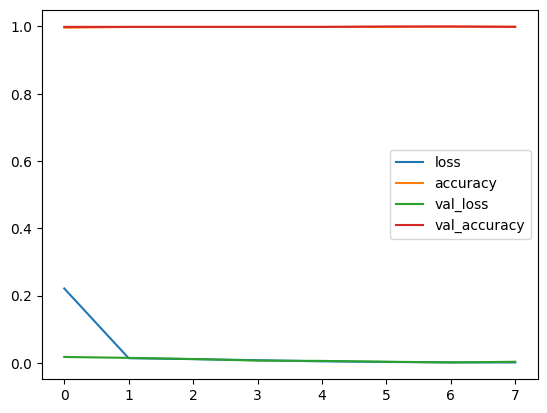

In [587]:
hist = Churn_predictor.history.history
newhist = pd.DataFrame(hist)
newhist.plot()

In [592]:
print(newhist)

       loss  accuracy  val_loss  val_accuracy
0  0.221228  0.996283  0.017673      0.998857
1  0.013961  0.998570  0.014934      0.998857
2  0.011217  0.998570  0.011531      0.998857
3  0.008023  0.998570  0.006879      0.998857
4  0.004635  0.998570  0.005922      0.998857
5  0.002760  0.998570  0.003577      1.000000
6  0.001633  0.999428  0.001271      1.000000
7  0.001369  0.999428  0.003368      0.998857


**Model Prediction on the testing data**

In [594]:
#X_test = X_test.astype('float32')
y_predict = Churn_predictor.predict(X_test)
#X_train = X_train.astype('float32')
y_train_predict = Churn_predictor.predict(X_train)

110/110 [==============================] - 0s 2ms/step


In [596]:
df = pd.DataFrame(y_predict)
df2 = pd.DataFrame(y_train_predict)

In [597]:
df.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [598]:
df2.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


**Saving the model**

In [599]:
Churn_predictor.save("Model.h5")

**Loading the model for prediction**

In [600]:
from tensorflow.keras.models import load_model
model = load_model('Model.h5')

In [604]:
predictions = model.predict(X_test)
print(predictions > 0.5)

28/28 [==============================] - 0s 5ms/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [

**Calculation of Recency, Frequency, Monetary scores**

In [484]:
def Recency_Score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [485]:
def Freq_Monetary_Score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [486]:
quantile = recency_frequency_monetary.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary,cluster,cluster2,Churn_risk
0.25,16.0,18.0,296.5425,0.0,0.0,0.0
0.50,50.0,46.0,676.1750,0.0,0.0,0.0
0.75,143.0,122.0,1871.5825,0.0,0.0,0.0


**Calculation of the Quartile values for  Recency, Frequency, Monetary**

In [487]:
recency_frequency_monetary['Recency_Quartile'] = recency_frequency_monetary['Recency'].apply(Recency_Score,args=('Recency',quantile))
recency_frequency_monetary['Frequency_Quartile'] = recency_frequency_monetary['Frequency'].apply(Freq_Monetary_Score, args=('Frequency',quantile))
recency_frequency_monetary['Monetary_Quartile'] = recency_frequency_monetary['Monetary'].apply(Freq_Monetary_Score, args=('Monetary',quantile))

In [488]:
quantile.to_dict()

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 18.0, 0.5: 46.0, 0.75: 122.0},
 'Monetary': {0.25: 296.5425, 0.5: 676.175, 0.75: 1871.5825},
 'cluster': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'cluster2': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'Churn_risk': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [489]:
recency_frequency_monetary['Recency_Frequency_Monetary_Score'] = recency_frequency_monetary.Recency_Quartile.map(str) \
                            + recency_frequency_monetary.Frequency_Quartile.map(str) \
                            + recency_frequency_monetary.Monetary_Quartile.map(str)
recency_frequency_monetary.head()

,Recency,Frequency,Monetary,cluster,cluster2,Churn_risk,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,Recency_Frequency_Monetary_Score
CustomerID,,,,,,,,,,
12346.0,325,2,0.00,0,0,0,4,4,4,444
12347.0,2,182,4310.00,0,0,0,1,1,1,111
12348.0,75,206,3366.27,0,0,0,3,1,1,311
12349.0,18,73,1757.55,0,0,0,2,2,2,222
12350.0,310,17,334.40,0,0,0,4,4,3,443


In [490]:
recency_frequency_monetary['Total_Score'] = recency_frequency_monetary.Recency_Quartile + recency_frequency_monetary.Frequency_Quartile + recency_frequency_monetary.Monetary_Quartile
recency_frequency_monetary.head()

,Recency,Frequency,Monetary,cluster,cluster2,Churn_risk,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,Recency_Frequency_Monetary_Score,Total_Score
CustomerID,,,,,,,,,,,
12346.0,325,2,0.00,0,0,0,4,4,4,444,12
12347.0,2,182,4310.00,0,0,0,1,1,1,111,3
12348.0,75,206,3366.27,0,0,0,3,1,1,311,5
12349.0,18,73,1757.55,0,0,0,2,2,2,222,6
12350.0,310,17,334.40,0,0,0,4,4,3,443,11


**Finding the type of customers**

In [491]:
print("Best Customers: ",len(recency_frequency_monetary[recency_frequency_monetary['Recency_Frequency_Monetary_Score']=='443']))
print('Loyal Customers: ',len(recency_frequency_monetary[recency_frequency_monetary['Frequency_Quartile']==4]))
print("Big Spenders: ",len(recency_frequency_monetary[recency_frequency_monetary['Monetary_Quartile']==3]))
print('Almost Lost: ', len(recency_frequency_monetary[recency_frequency_monetary['Recency_Frequency_Monetary_Score']=='134']))
print('Lost Customers: ',len(recency_frequency_monetary[recency_frequency_monetary['Recency_Frequency_Monetary_Score']=='344']))
print('Lost Cheap Customers: ',len(recency_frequency_monetary[recency_frequency_monetary['Recency_Frequency_Monetary_Score']=='444']))

Best Customers:  106
Loyal Customers:  1102
Big Spenders:  1093
Almost Lost:  21
Lost Customers:  180
Lost Cheap Customers:  384


In [492]:
Best_Customers = len(recency_frequency_monetary[recency_frequency_monetary['Recency_Frequency_Monetary_Score']=='443'])
Loyal_Customers = len(recency_frequency_monetary[recency_frequency_monetary['Frequency_Quartile']==4])
Big_Spenders = len(recency_frequency_monetary[recency_frequency_monetary['Monetary_Quartile']==3])
Almost_Lost = len(recency_frequency_monetary[recency_frequency_monetary['Recency_Frequency_Monetary_Score']=='134'])
Lost_Customers = len(recency_frequency_monetary[recency_frequency_monetary['Recency_Frequency_Monetary_Score']=='344'])
Lost_Cheap_Customers =len(recency_frequency_monetary[recency_frequency_monetary['Recency_Frequency_Monetary_Score']=='444'])

In [493]:
d = {'Best_Customers':[106], 'Loyal_Customers':[1102], 'Big_Spenders':[1093], 'Almost_Lost':[21], 'Lost_Customers':[180], 'Lost_Cheap_Customers':[384]}
df = pd.DataFrame(d)

In [494]:
df

,Best_Customers,Loyal_Customers,Big_Spenders,Almost_Lost,Lost_Customers,Lost_Cheap_Customers
0,106,1102,1093,21,180,384


<Axes: >

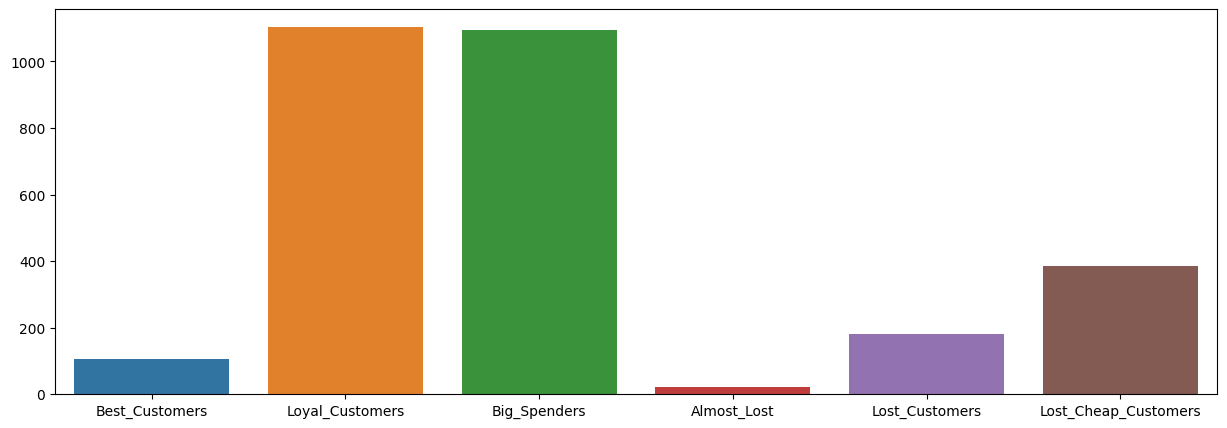

In [495]:
plt.figure(figsize = (15,5))
sns.barplot(df)

**Adding all the newly calculated scores to the dataframe**

In [496]:
recency_frequency_monetary.sort_values(by=['Recency_Frequency_Monetary_Score', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,cluster,cluster2,Churn_risk,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,Recency_Frequency_Monetary_Score,Total_Score
CustomerID,,,,,,,,,,,
14646.0,1,2385,282038.74,1,1,1,1,1,1,111,3
18102.0,0,1860,272390.60,1,1,1,1,1,1,111,3
17450.0,8,371,187523.77,1,1,1,1,1,1,111,3
14911.0,1,7648,147375.15,1,2,1,1,1,1,111,3
14156.0,9,2825,126339.52,1,2,1,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...,...,...
12666.0,359,2,-227.44,0,0,0,4,4,4,444,12
15083.0,256,7,-596.71,0,0,0,4,4,4,444,12
12503.0,337,2,-1126.00,0,0,0,4,4,4,444,12


**Plot for Total_Recency_Score**

Text(0.5, 1.0, 'Total_Recency_Score')

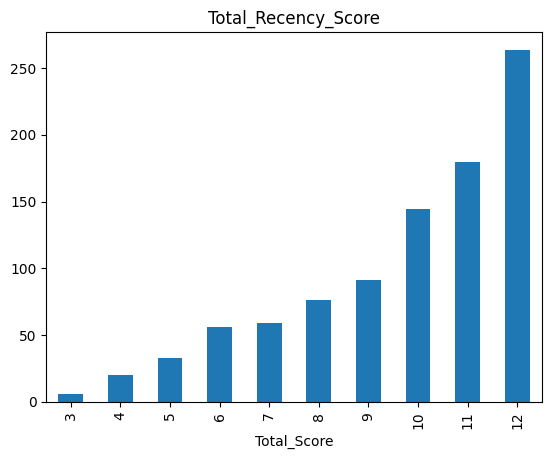

In [497]:
recency_frequency_monetary.groupby('Total_Score')['Recency'].mean().plot(kind='bar')
plt.title('Total_Recency_Score')

**Plot for Total_Frequency_Score**

Text(0.5, 1.0, 'Total_Frequency_Score')

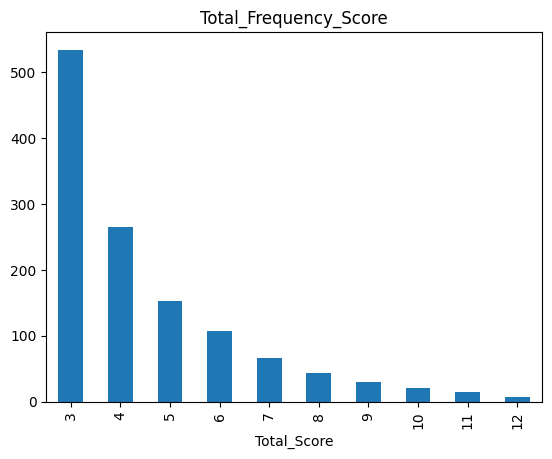

In [498]:
recency_frequency_monetary.groupby('Total_Score')['Frequency'].mean().plot(kind='bar')
plt.title('Total_Frequency_Score')

**Plot for Total_Monetary_Score**

Text(0.5, 1.0, 'Total_Monetary_Score')

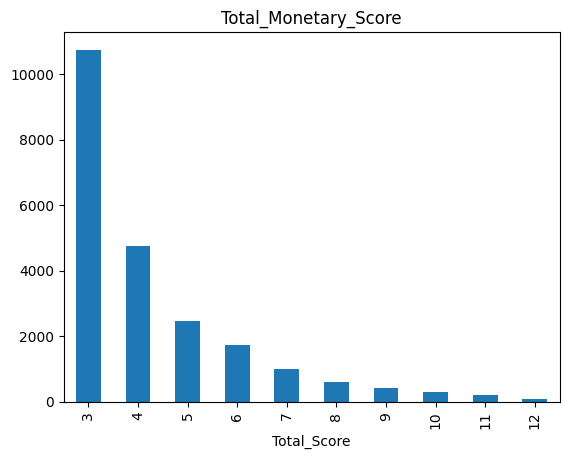

In [499]:
 recency_frequency_monetary.groupby('Total_Score')['Monetary'].mean().plot(kind='bar')
 plt.title('Total_Monetary_Score')

**Heatmap of RFM data representing the correlation between the attributes**

<Axes: >

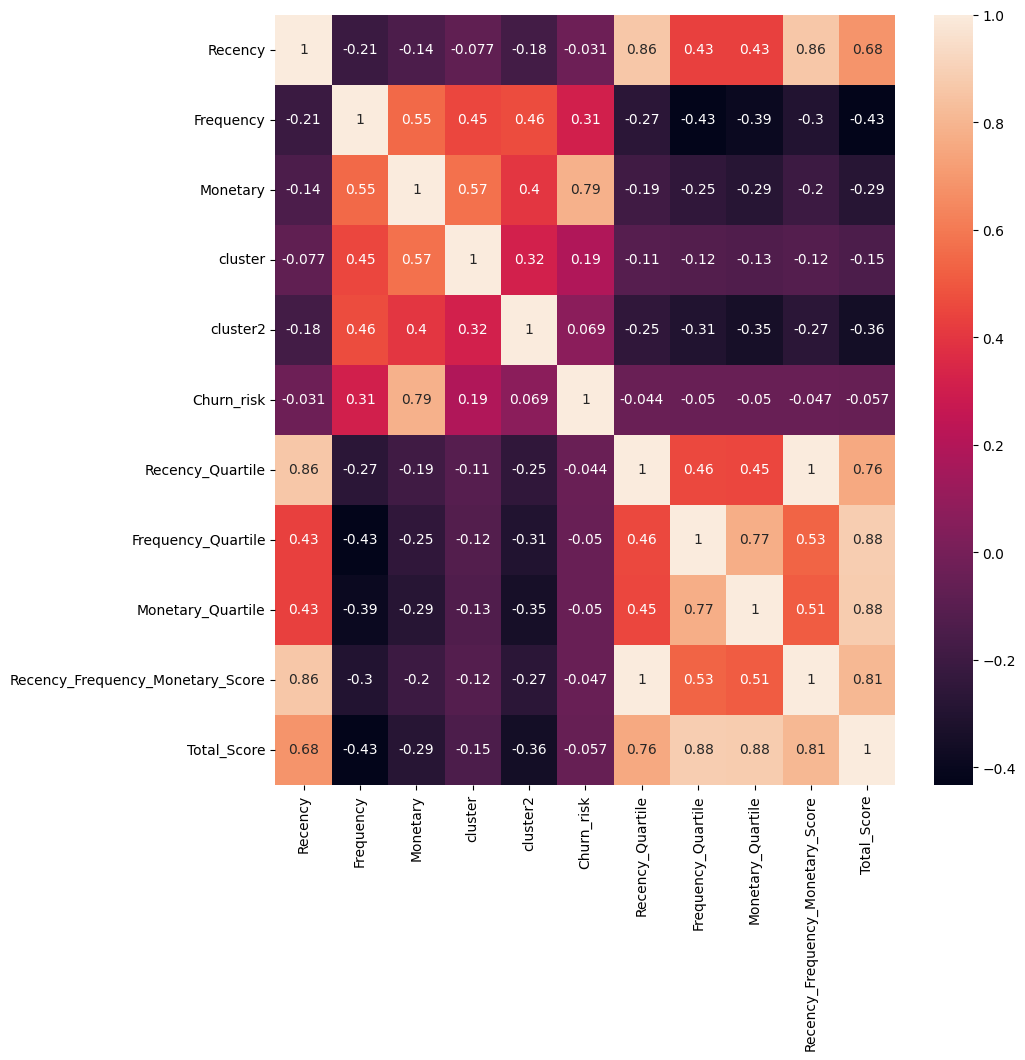

In [500]:
plt.figure(figsize = (10, 10))
sns.heatmap(recency_frequency_monetary.corr(), annot = True)

In [501]:
new = c.groupby(['CustomerID'], as_index = False)['date'].max()
new.columns = ['CustomerID', 'LastPurchaseDate']
new.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [502]:
new = new.drop('CustomerID', axis = 1)

In [503]:
new

,LastPurchaseDate
0,2011-01-18
1,2011-12-07
2,2011-09-25
3,2011-11-21
4,2011-02-02
...,...
4367,2011-03-07
4368,2011-06-12
4369,2011-12-02
4370,2011-12-06


In [504]:
new['Recency'] = (new['LastPurchaseDate'].max() - new['LastPurchaseDate']) / pd.Timedelta('1 day')

In [505]:
new

,LastPurchaseDate,Recency
0,2011-01-18,325.0
1,2011-12-07,2.0
2,2011-09-25,75.0
3,2011-11-21,18.0
4,2011-02-02,310.0
...,...,...
4367,2011-03-07,277.0
4368,2011-06-12,180.0
4369,2011-12-02,7.0
4370,2011-12-06,3.0


In [506]:
new['Frequency'] = 1 / new['Recency']
new['LastPurchaseDate'] = pd.to_datetime(new['LastPurchaseDate'])

**New data derived from the original data for the time series analysis**

In [507]:
new

,LastPurchaseDate,Recency,Frequency
0,2011-01-18,325.0,0.003077
1,2011-12-07,2.0,0.500000
2,2011-09-25,75.0,0.013333
3,2011-11-21,18.0,0.055556
4,2011-02-02,310.0,0.003226
...,...,...,...
4367,2011-03-07,277.0,0.003610
4368,2011-06-12,180.0,0.005556
4369,2011-12-02,7.0,0.142857
4370,2011-12-06,3.0,0.333333


In [508]:
forecast_data = new[["Recency", "Frequency"]]

**Using the Prophet model for the time series analysis**

In [509]:
from prophet import Prophet
import datetime
recency_model = Prophet()
frequency_model = Prophet()
new = new.rename(columns={"LastPurchaseDate": "ds", "Recency": "y"})
forecast_horizon = 3
recency_model.fit(new[["ds", "y"]])
frequency_model.fit(new[["ds", "y"]])
future_dates = pd.date_range(start=new["ds"].max() + datetime.timedelta(days=1), periods=forecast_horizon + 1, freq="D")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpij8pfnyz/o9pkblto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpij8pfnyz/t87vwrqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57721', 'data', 'file=/tmp/tmpij8pfnyz/o9pkblto.json', 'init=/tmp/tmpij8pfnyz/t87vwrqn.json', 'output', 'file=/tmp/tmpij8pfnyz/prophet_model54j6lghz/prophet_model-20240516070150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

In [510]:
new

,ds,y,Frequency
0,2011-01-18,325.0,0.003077
1,2011-12-07,2.0,0.500000
2,2011-09-25,75.0,0.013333
3,2011-11-21,18.0,0.055556
4,2011-02-02,310.0,0.003226
...,...,...,...
4367,2011-03-07,277.0,0.003610
4368,2011-06-12,180.0,0.005556
4369,2011-12-02,7.0,0.142857
4370,2011-12-06,3.0,0.333333


**Storing the values in the dataframe**

In [511]:
import datetime
forecast_data = pd.DataFrame({
    "Date":new["ds"],
    "Recency": new["y"],
    "Frequency": new["Frequency"]
})
column_names = list(forecast_data.columns) + ["month"]
forecast_horizon = 3
combined_forecast = pd.DataFrame({
    "month": pd.date_range(start=new["ds"].max() + datetime.timedelta(days=1), periods=forecast_horizon + 1, freq="M").format("%m-%Y")})
forecast_data = {
    "month": pd.to_datetime(new["ds"]).dt.strftime("%m-%Y"),
    "recency": forecast_data["Recency"],  # Include the "recency" column
    "frequency": forecast_data["Frequency"]
}
columns=column_names
forecast_data = pd.DataFrame(forecast_data)

In [512]:
forecast_data = forecast_data.sort_values(by="month", ascending=True)
print(forecast_data)

        month  recency  frequency
0     01-2011    325.0   0.003077
508   01-2011    318.0   0.003145
2445  01-2011    336.0   0.002976
2456  01-2011    317.0   0.003155
3333  01-2011    333.0   0.003003
...       ...      ...        ...
2538  12-2011      5.0   0.200000
2537  12-2011      7.0   0.142857
1551  12-2011      0.0        inf
3600  12-2011      2.0   0.500000
1998  12-2011      8.0   0.125000

[4372 rows x 3 columns]


**Time Series graph**

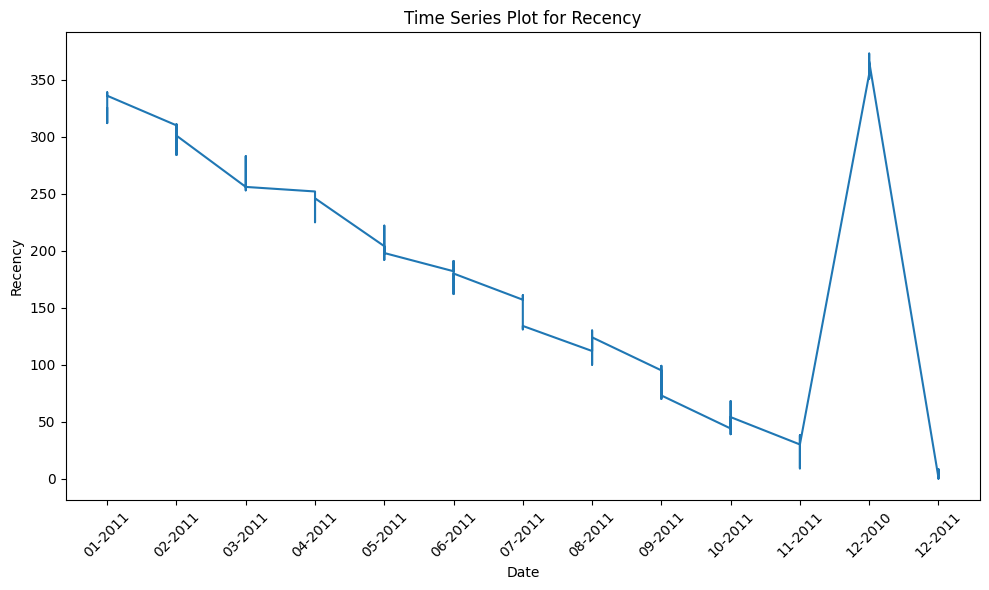

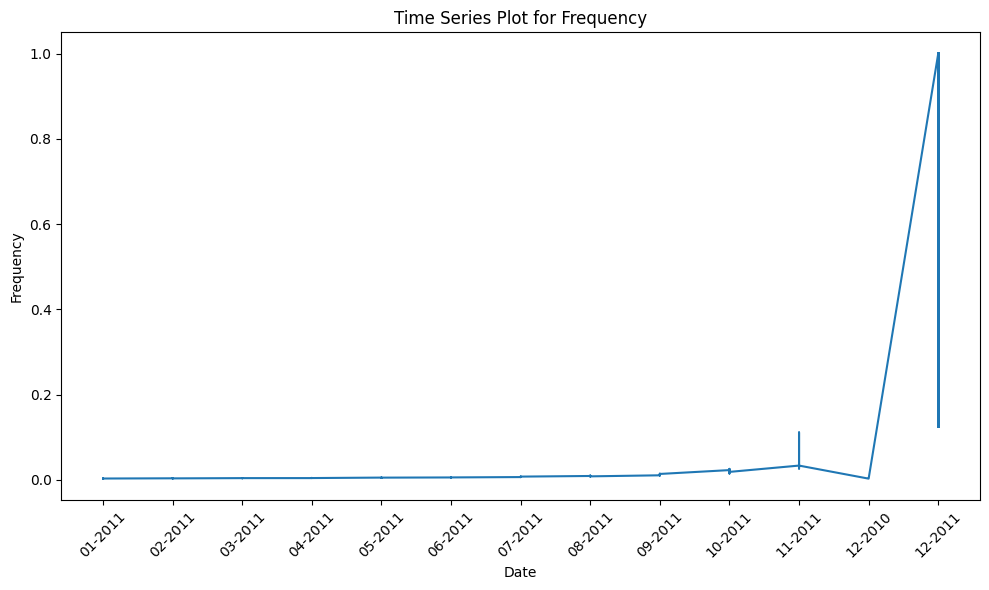

In [513]:
import matplotlib.pyplot as plt

# Plot the time series for Recency
plt.figure(figsize=(10, 6))
plt.plot(forecast_data["month"], forecast_data["recency"], label="Recency")
plt.xlabel("Date")
plt.ylabel("Recency")
plt.title("Time Series Plot for Recency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the time series for Frequency
plt.figure(figsize=(10, 6))
plt.plot(forecast_data["month"], forecast_data["frequency"], label="Frequency")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Time Series Plot for Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()